* sumbitted by - Manjula kuncha
* project title - Amazon Sales Data Analysis
* Technologies -python, powerbi 
* Domain -Ecommerce
* Difficulty Level- Advanced

AMAZON SALES EDA AND VISUVALIZATON

# import libraries

In [1]:
import numpy as np  #for numeric operations
import pandas as pd #to analyse,clean,filter,manipulate ,explore datasets
import matplotlib.pyplot as plt #Data visuvalization and analysis
%matplotlib inline
import seaborn as sns #for advance visuvalizations with matplotlib
from IPython.display import Image  #importing libary to display the image
import os #import operating system to direct the folders
import datetime # datetime is useful to date_time series analysis

# ignore warnings:

In [2]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

# PROBLEM:
Sales management has gained importance to meet increasing competition and theneed for improved methods of distribution to reduce cost and to increase profits. Salesmanagement today is the most important function in a commercial and business
enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes.

# loading dataset by using pandas

In [3]:
sales=pd.read_csv("/kaggle/input/amazonsales-analyzing/Amazon Sales data.csv")
sales

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


# About Dataset
 This dataset have 1 csv file with 100 rows  and 14 columns:
 * Region: name of the region
 * Country: name of the country
 * Item Type: item categorie
 * SalesChannel: mode of sales
 * Order Priority: priority
 * Order Date: date of order
 * Order ID	: order id number
 * Ship Date: shipping date
 * Units Sold: how many units 
 * Unit Price: price of one unit
 * Unit Cost: cost of one unit
 * Total Revenue: total revenue
 * Total Cost:total cost
 * Total Profit:peofit gained by amazon

# Data Proccesing
* explorings rows and columns

In [4]:
sales.head()#first5 columns of dataset

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
sales.tail(5) #bottom 5  columns of dataset

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [6]:
sales.describe()  #gives the summary about the dataset in detailed form

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
sales.info()#gives the information like datatypes and null count for every columns and rows in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
type(sales) #dataset type is  dataframe as it is the combination of  mutlple series 

pandas.core.frame.DataFrame

In [9]:
type(sales["Unit Cost"])  #single column in dataset will be consider as series

pandas.core.series.Series

In [10]:
sales.shape # shape of the dataset

(100, 14)

In [11]:
sales.index  #index of dataframe from starting to end range will be shown

RangeIndex(start=0, stop=100, step=1)

In [12]:
sales.columns#values in dataframe will appear

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [13]:
sales.set_index('Order ID',inplace=True)#for setting customized index

In [14]:
sales.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [15]:
sales.reset_index(inplace=True)

# Data cleaning
* Data cleaning is the process of fixing or removing incorrect, null,corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

# benfitis of data cleaning
* Error free data
* Acurracy and effiency
* Data quality
* Data consistency

In [16]:
print(sales.isnull().sum()) # no null values in  columns

Order ID          0
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


**There are no null values in amazon sales dataset if there are any null  values we must handle them or drop them before doing EDA,modelling, visuvalization**

In [17]:
sales.duplicated(subset=['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'])
#checks for duplicates in this dataset

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [18]:
sales.drop_duplicates(subset=['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'])
len(sales)   #the length before drop duplicates and after is same therefore there are no dupliacates in dataset
#if length and drop duplicates changes then there are duplicates

100

In [19]:
sales.size  #gives the size of dataframe

1400

In [20]:
sales.ndim  #this dataframe is 2d array

2

**after removing null values and duplicates from dataset now the data is efficent for the modelling,visuvalization and analysis **

#  Exploratory Data  Analysis & Visualization
* EDA plays an important role in Data Analysis
* Explanatory data analytics focuses on all the parts of context, mainly the why and how. An outcome can be statistically calculated, modeled, or visualized to tell you the likelihood of certain events based on preconceived variables.

In [21]:
sales.iloc[20:30:2]  #accesing dataframes with iloc accessor where range is excluive

,Order ID,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
20,819028031,Europe,Norway,Baby Food,Online,L,5/14/2014,6/28/2014,7450,255.28,159.42,1901836.00,1187679.00,714157.00
22,795490682,Central America and the Caribbean,Honduras,Snacks,Online,L,6/30/2016,7/26/2016,2225,152.58,97.44,339490.50,216804.00,122686.50
24,740147912,Europe,Moldova,Personal Care,Online,L,5/7/2016,5/10/2016,5070,81.73,56.67,414371.10,287316.90,127054.20
26,347140347,Australia and Oceania,Kiribati,Fruits,Online,M,10/13/2014,11/10/2014,5398,9.33,6.92,50363.34,37354.16,13009.18
28,435608613,Europe,Norway,Beverages,Offline,C,7/18/2014,7/30/2014,5124,47.45,31.79,243133.80,162891.96,80241.84


In [22]:
sales["Item Type"].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

**Top 3 items  categories which are sold in amazon are**
* clothes
* cosemtics
* office supplies


# calculating year sales

In [23]:
import datetime # to get the date, year and month from order date
sales["years"]=pd.to_datetime(sales['Order Date']).dt.year
sales["month"]=pd.to_datetime(sales['Order Date']).dt.month
sales["day"]=pd.to_datetime(sales['Order Date']).dt.day

In [24]:
sales.head() # new columns has been added to dataframe

,Order ID,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,years,month,day
0,669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28
1,963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22
2,341417157,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2
3,514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20
4,115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1


In [25]:
year_sales=sales[['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit','years','month']] 

,years,Total Revenue
0,2010,19186024.92
1,2011,11129166.07
2,2012,31898644.52
3,2013,20330448.66
4,2014,16630214.43
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


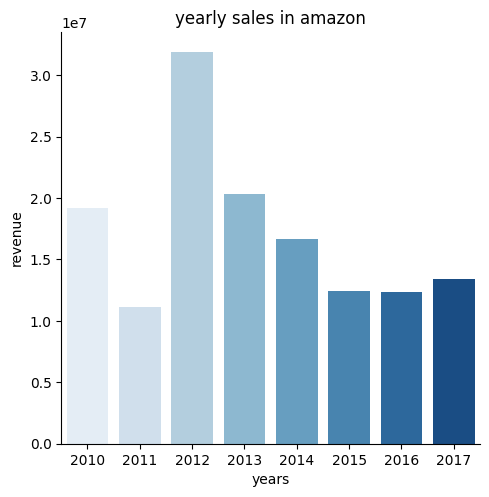

In [26]:
yearly_sales=year_sales.groupby('years').sum().reset_index()
sns.catplot(y= "Total Revenue",x='years' ,data= yearly_sales ,palette ="Blues",kind ="bar")
plt.xlabel("years")
plt.ylabel("revenue")
plt.title("yearly sales in amazon")
yearly_sales[['years',"Total Revenue"]]

**Observation**:
* by the above graph we can say that the revenue genrated by amazon in 2012,2010,2017  is higher than other years
* in 2011 amazon generated least revenue 
* sales continously dropping from 2010.

# calculating monthly sales of amazon 

<Axes: xlabel='month', ylabel='Total Revenue'>

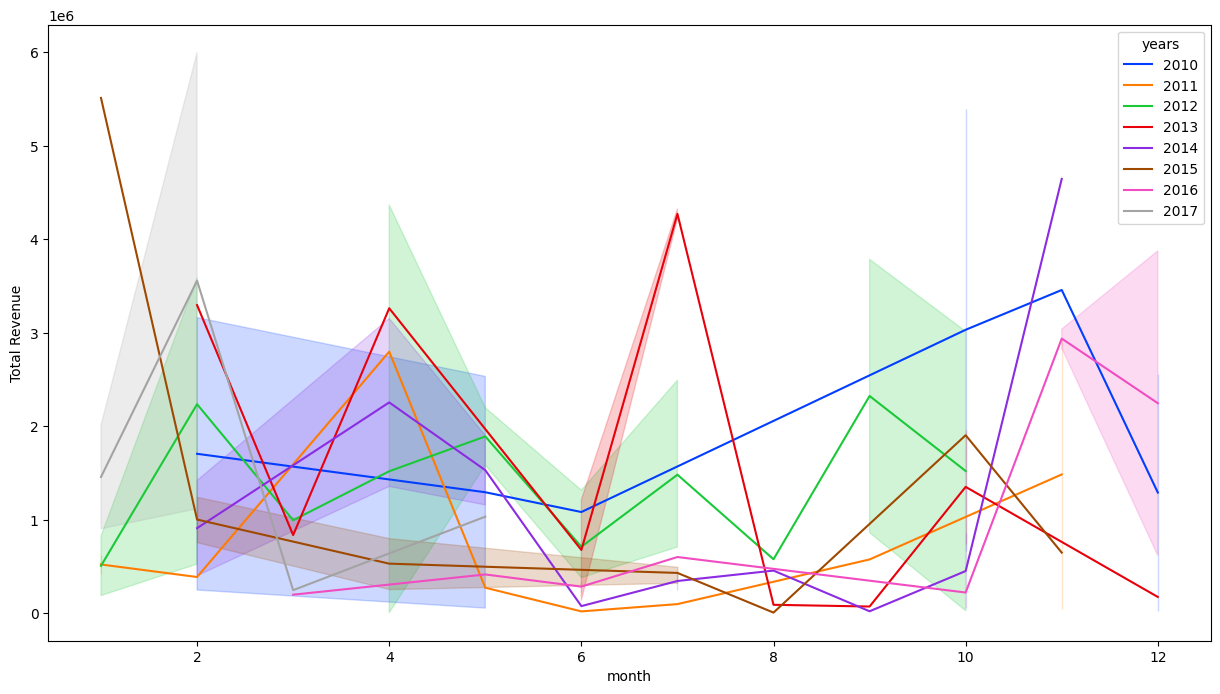

In [27]:
plt.figure(figsize = (15,8)) 
sns.lineplot(y = "Total Revenue", x="month", data=sales.groupby (['Order Date', 'years', 'month']).sum(),
             hue ='years', palette='bright')

*Observation*:
* the sales of amazon are mostly increasing first quater and last quater of the year
* until 2017 dec the highest revenue genrated by amazon happened in 2010 janurary.

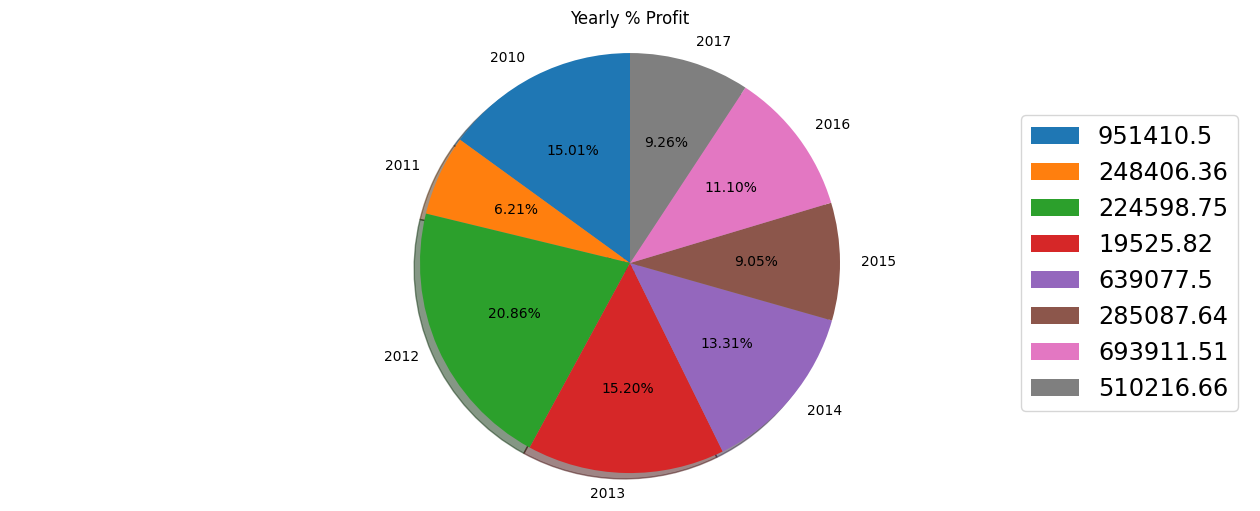

In [28]:
plt.figure(figsize=(16,6))

plt.pie('Total Profit', labels = 'years', data=yearly_sales, autopct = '%1.2f%%', shadow= True, startangle = 90)

plt.axis('equal')

plt.title('Yearly % Profit')

plt.legend (round (sales['Total Profit'],2), loc =7, fontsize ="xx-large")

plt.show()

**observation**:
* year 2012 has gained more profit than remaining years.
* followed by 2012 ,2013,2010 has gained more profit 
* from 2012 to 2015 the profit has been gradually decreasing

**sales channel impact on sales**

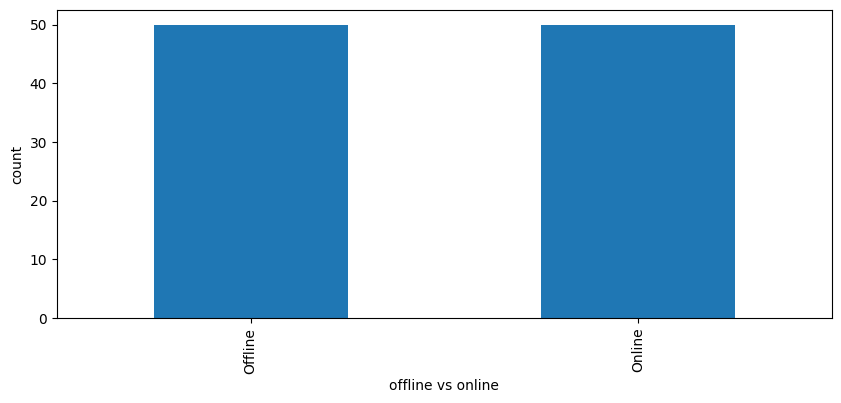

In [29]:
plt.figure(figsize=(10,4))
sales['Sales Channel'].value_counts().plot.bar()
plt.xlabel("offline vs online")
plt.ylabel("count")
plt.show()

**observation:**
* by the above graph we can clarify that the chanel of sales is not much effecting on the increasing of sales

**order priority impact on sales**

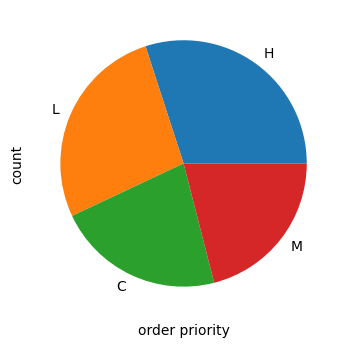

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

In [30]:
plt.figure(figsize=(10,4))
sales['Order Priority'].value_counts().plot.pie()
plt.xlabel("order priority")
plt.ylabel("count")
plt.show()
sales['Order Priority'].value_counts()

**observation:**
* by the above graph we can clarify that the order priority is not much effecting on the increasing of sales
* "H" priority orders are more placed  on amazom sales

# yearly_monthly sales of amazon 

In [31]:
yearly_monthly_sales=sales.groupby(['years','month']).sum().reset_index()

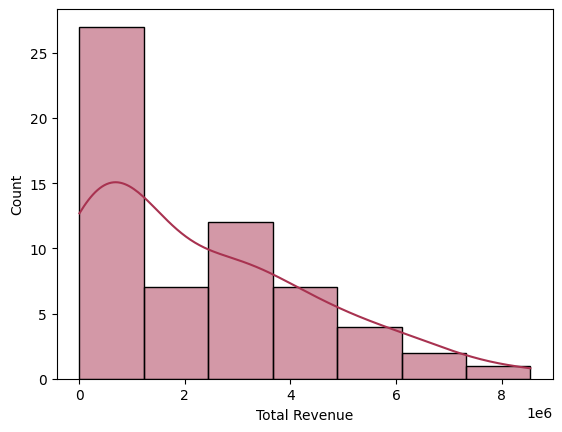

In [32]:
sns.histplot(yearly_monthly_sales['Total Revenue'],kde=True,color="#a83250")
plt.show()

**observation:**
* we can observe that the by every month the sales are decreasing .


# monthly sales  report on basis of units sold on different days of month.

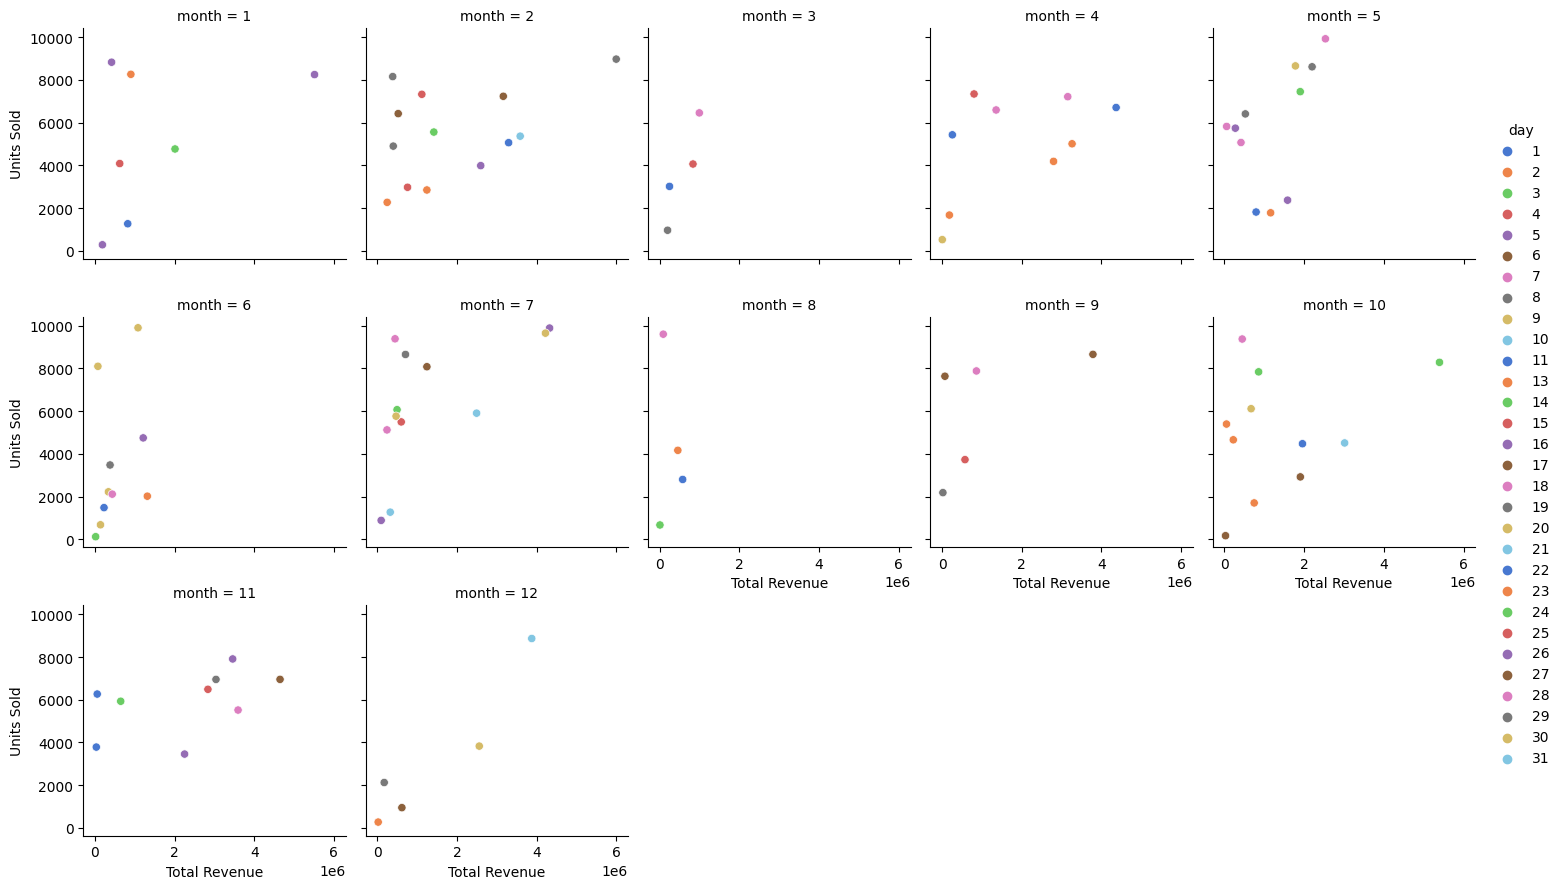

In [33]:
monthly_sales=sales.groupby(["years","month","day"]).sum().reset_index()
sns.relplot(x='Total Revenue',y="Units Sold",data=sales,height=3,aspect=1,col="month",col_wrap =5, palette ="muted",hue="day")

**Observation:**
* from the above plots we can say that the units sold on weekends are more than weekdays
* there is more flucatation in sales of item with respect to months.

# correlation

In [34]:
sales.set_index('Order ID',inplace=True)#for setting customized index

In [35]:
sales_correlation=sales[["Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit","years","month","day"]]
sales_correlation.head()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,years,month,day
Order ID,,,,,,,,,
669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28
963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22
341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2
514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20
115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1


<Axes: >

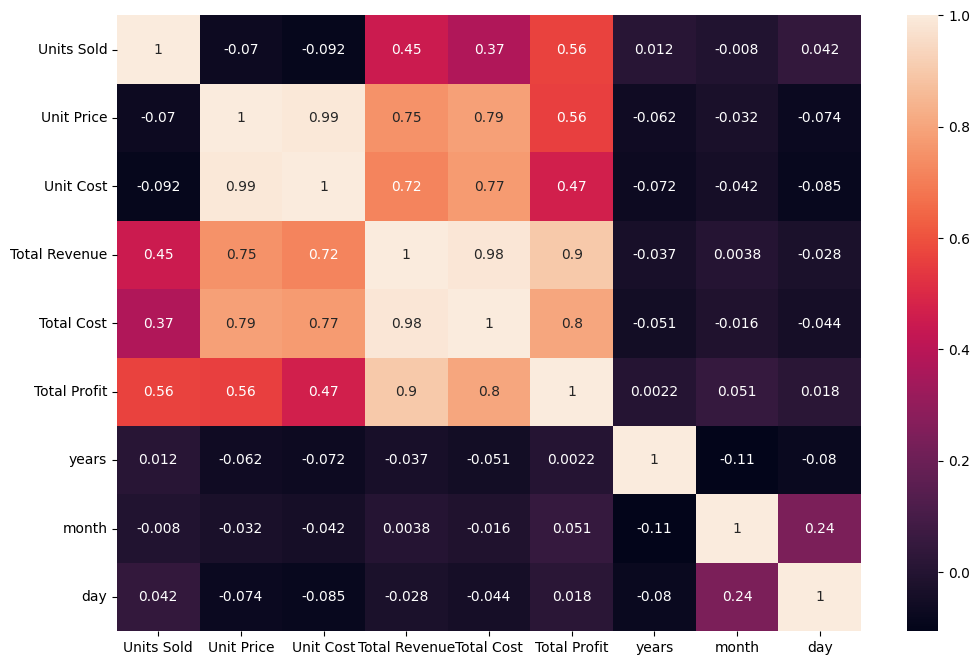

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(sales_correlation.corr(),annot=True)

**Summary:**
* sales quantity is moderately related  to the  unit price ,unit quantity, cost, price ,discount .
* buyers are more interested in buying during the high discounts and sal seasons
* total profit is realted to the units quantity proportionally
* showing some attractive offers and discounts on branded products lead to sales improvement.
* improvement in fastest delivery system will be needed as the gap between order date and ship dates leads to disencouraging for buyer
* knowing buyers interest and giving discounts on the products will leads to improvement in  sales.
* home needs and coustmes are the most important categorie which is in lead .so we must concentrarte on these areas.
** By the above careful observation we need to concentrarte on above areas for improving the sales and profits in these strong competetion in ecommerce and online business.

* IF YOU GUYS INTERSTED PLEASE CHECK OUT POWERBI DASHBOARD
[https://drive.google.com/file/d/1a6UPduksCNNyb_OfCE0MzYNIsIJhKaON/view?usp=sharing](http://)

Thankyou for visting please do an upvote if you find the notebook useful.